<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** María Fernanda Amador Alvarez, Xareny Gonzalez Lopez.

**Fecha:** 23 de noviembre del 2021.

**Expediente** : 725573, 720811.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/feramdor/Tarea8_Amador_Gonzalez

# Tarea 8: Clase 22

## Enunciado de tarea 
> Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de compararlo con los resultados teóricos del método de valuación de Black-Scholes (ecuación del principio)

In [15]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)


#### Código de solución `Estudiante 1: Fernanda Amador`

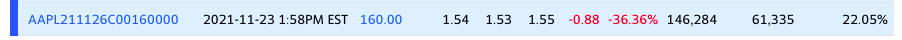

> Podemos observar que se tiene un strike price de 160, lo cual se utilizará a lo largo de la tarea.

In [2]:
# Funciones
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

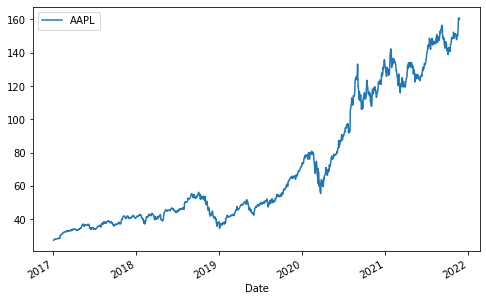

In [3]:
# Obtenemos precios al cierre
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

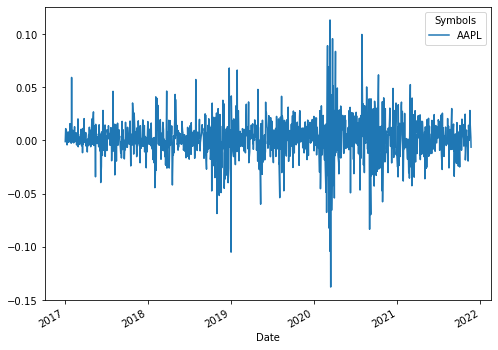

In [4]:
# Obtenemos los rendimientos 
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [5]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-11-17,0.016
2021-11-18,0.029
2021-11-19,0.017


In [6]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-09-16'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
                '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
                '2022-09-15', '2022-09-16'],
               dtype='datetime64[ns]', length=214, freq='B'),
 214)

In [7]:
ri = calc_daily_ret(closes_aapl)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]


# Simulación del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [8]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014343584295070052, 0.019199243953207122)

In [9]:
# Tasa de bonos de 1 yr de fecha 19/11/2021 -> 0.18%
r = 0.00018/360 # Tasa diaria

In [10]:
today = pd.to_datetime(date.today())
expiry = '2022-09-16'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', length=214, freq='B')

In [11]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,-0.026,0.017,0.010,...,-0.018,1.611e-02,-0.002
2021-11-24,-0.034,0.012,0.024,...,-0.014,8.479e-03,-0.015
2021-11-25,-0.035,0.003,0.046,...,-0.012,2.413e-04,-0.024
2021-11-26,-0.078,0.004,0.031,...,-0.025,2.370e-02,-0.044
2021-11-29,-0.074,-0.019,0.022,...,-0.064,2.417e-02,-0.050
...,...,...,...,...,...,...,...
2022-09-12,-0.204,-0.300,0.346,...,-0.470,-3.893e-01,0.089
2022-09-13,-0.207,-0.302,0.344,...,-0.495,-3.651e-01,0.086
2022-09-14,-0.211,-0.286,0.353,...,-0.506,-3.402e-01,0.100
2022-09-15,-0.171,-0.322,0.322,...,-0.511,-3.206e-01,0.060


In [12]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,155.943,162.772,161.576,...,157.185,162.604,159.683
2021-11-24,154.615,161.894,163.820,...,157.780,161.367,157.582
2021-11-25,154.431,160.458,167.617,...,158.088,160.044,156.187
2021-11-26,148.042,160.710,165.099,...,156.053,163.843,153.191
2021-11-29,148.660,157.041,163.534,...,150.057,163.919,152.195
...,...,...,...,...,...,...,...
2022-09-12,130.447,118.575,226.053,...,100.028,108.412,174.885
2022-09-13,130.039,118.322,225.618,...,97.498,111.065,174.397
2022-09-14,129.630,120.247,227.663,...,96.443,113.859,176.788
2022-09-15,134.813,115.960,220.746,...,96.020,116.116,169.847


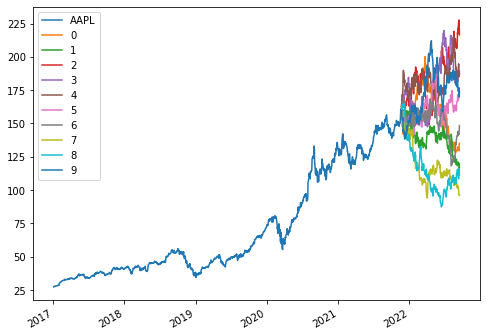

In [13]:
# Precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize = (8,6));

In [14]:
from datetime import date
Hoy = date.today()
expiry = '2022-09-16'
K = 160 # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

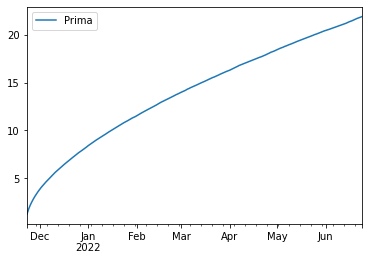

In [15]:
# Valor del call 
strike = 160
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike, 0).mean(axis=1)}, 
                    index = dates)
call.plot();

In [16]:
call.iloc[-1]

Prima    21.885
Name: 2022-06-24 00:00:00, dtype: float64

In [17]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(21.587372481726796, 22.181889269488607)
(21.58737607967272, 22.181885671542684)


### Utilizando BlackScholes

In [18]:
# Datos para usar en la fórmula (anualizados)
vol = ret_aapl['AAPL'].std()*np.sqrt(252)
media = ret_aapl['AAPL'].mean()*252
maduracion = ndays
st = closes_aapl.iloc[-1,0]
rf = r*360
print('Volatilidad anual',vol)
print('Tiempo de maduración',maduracion,'días')
print('Spot price',st)
print('Strike Price',K)
print('Tasa Libre de riesgo',r*360*100)

Volatilidad anual 0.30477854916388
Tiempo de maduración 214 días
Spot price 160.0050048828125
Strike Price 160
Tasa Libre de riesgo 0.018000000000000002


In [19]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('El valor de la opción con Black Scholes es:',put,'y el valor de la opción simulado es de:',call.iloc[-1].values)


El valor de la opción con Black Scholes es: 19.360876050192473 y el valor de la opción simulado es de: [21.88463088]


> Podemos ver la que la diferencia entre el modelo de BlackScholes y el valor que nos da en la simulación nos da unos valores un poco alejados, se puede concluir entonces que se tuvieron buenos resultados con poca diferencia, se tuvo una buena aproximación de resultados.

#### Código de solución `Estudiante 2: Xareny Gonzalez`

In [63]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [64]:
# Funciones
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

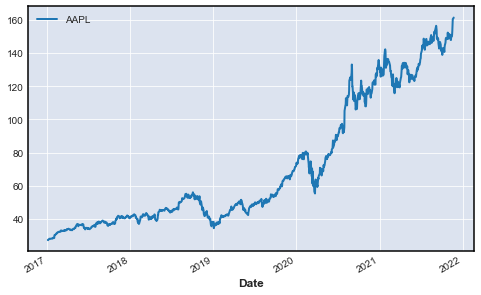

In [66]:
# Obtenemos precios al cierre
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

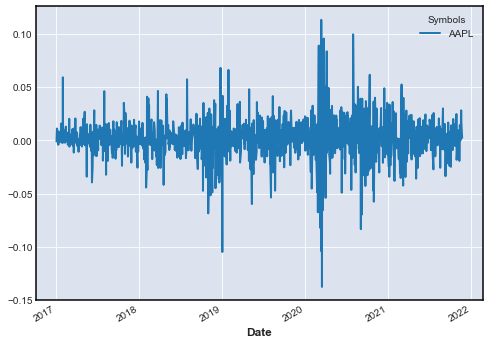

In [65]:
# Obtenemos los rendimientos 
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [67]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-11-17,0.016
2021-11-18,0.029
2021-11-19,0.017


In [68]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-09-16'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
                '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
                '2022-09-15', '2022-09-16'],
               dtype='datetime64[ns]', length=214, freq='B'),
 214)

In [69]:
ri = calc_daily_ret(closes_aapl)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]


# Simulación del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [70]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014414548974948295, 0.019197992244745832)

In [71]:
# Tasa de bonos de 1 yr de fecha 19/11/2021 -> 0.18%
r = 0.00018/360 # Tasa diaria

In [72]:
today = pd.to_datetime(date.today())
expiry = '2022-09-16'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', length=214, freq='B')

In [73]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,-0.008,-0.014,0.012,...,-0.011,-0.012,-0.040
2021-11-24,-0.022,-0.002,0.022,...,-0.027,-0.021,-0.028
2021-11-25,0.012,0.020,-0.002,...,-0.031,0.007,-0.010
2021-11-26,-0.003,0.025,-0.015,...,-0.029,-0.003,0.008
2021-11-29,-0.033,0.022,-0.039,...,-0.036,-0.017,0.012
...,...,...,...,...,...,...,...
2022-09-12,-0.275,0.031,-0.416,...,-0.129,-0.231,-0.591
2022-09-13,-0.261,0.013,-0.425,...,-0.146,-0.243,-0.562
2022-09-14,-0.264,0.013,-0.418,...,-0.113,-0.270,-0.514
2022-09-15,-0.281,0.034,-0.414,...,-0.104,-0.265,-0.515


In [74]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,160.153,159.217,163.397,...,159.570,159.447,155.103
2021-11-24,157.845,161.141,165.016,...,157.142,158.074,156.916
2021-11-25,163.368,164.707,161.100,...,156.501,162.510,159.868
2021-11-26,160.955,165.562,158.981,...,156.797,160.899,162.659
2021-11-29,156.133,165.057,155.235,...,155.696,158.621,163.392
...,...,...,...,...,...,...,...
2022-09-12,122.571,166.416,106.518,...,141.822,128.097,89.398
2022-09-13,124.339,163.540,105.526,...,139.415,126.649,92.025
2022-09-14,123.950,163.513,106.302,...,144.098,123.234,96.545
2022-09-15,121.870,166.957,106.666,...,145.474,123.847,96.457


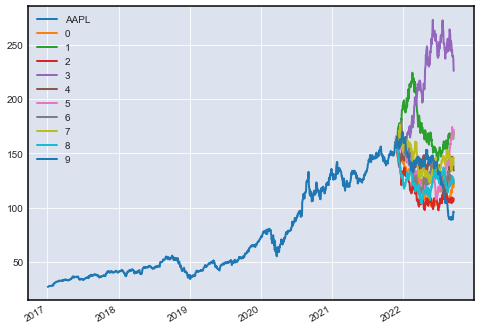

In [75]:
# Precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize = (8,6));

In [99]:
from datetime import date
today = date.today()
expiry = '2022-09-16'
K = 160 # strike price
nscen = 100000
dates = pd.date_range(start= today, 
                      periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

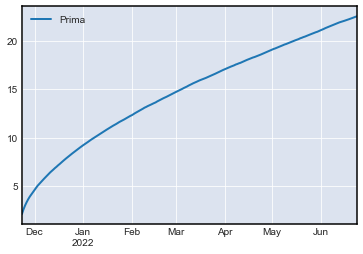

In [82]:
# Valor del call 
strike = 160
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike, 0).mean(axis=1)}, 
                    index = dates)
put.plot();

In [83]:
put.iloc[-1]

Prima    22.543
Name: 2022-06-24 00:00:00, dtype: float64

In [101]:
conf = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
print(i1)
print(i2)

(22.244304952462375, 22.841567852858294)
(22.24430856702745, 22.84156423829322)


### BlackScholes

In [97]:
# Datos para usar en la fórmula (anualizados)
vol = ret_aapl['AAPL'].std()*np.sqrt(252)
media = ret_aapl['AAPL'].mean()*252
maduracion = ndays
st = closes_aapl.iloc[-1,0]
rf = r*360
print('Vol anual',vol)
print('T. de maduración',maduracion,'días')
print('Spot',st)
print('Strike ',K)
print('Tasa Libre de riesgo',r*360*100)

Vol anual 0.3047586789080648
T. de maduración 214 días
Spot 161.41000366210938
Strike  160
Tasa Libre de riesgo 0.018000000000000002
